In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\heart_disease_cleaned.csv")

In [22]:
X = df.drop(columns=["num"])
y = df["num"]

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [25]:
# Explained variance
explained = pca.explained_variance_ratio_
cum_explained = explained.cumsum()

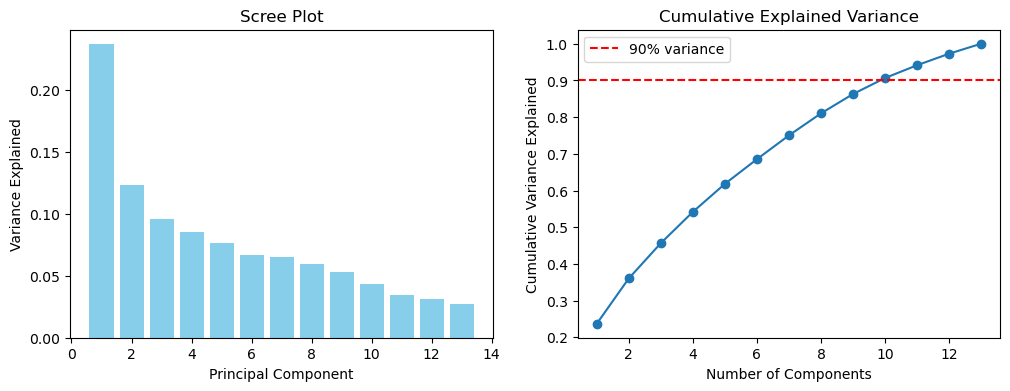

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.bar(range(1, len(explained)+1), explained, color="skyblue")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")

plt.subplot(1,2,2)
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.axhline(0.9, color="red", linestyle="--", label="90% variance")
plt.legend()
plt.title("Cumulative Explained Variance")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# Pick number of components (example: keep 95% variance)
n_components = 10   # adjust it on 90% variance of data

# Build a pipeline: StandardScaler + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])

# Fit pipeline on features
X_pca_final = pipeline.fit_transform(X)

# Create DataFrame with principal components + target
pca_columns = [f"PC{i+1}" for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)
df_pca["num"] = y.values

# Save PCA-transformed dataset
df_pca.to_csv("C:/Users/pc/Downloads/heart_pca.csv", index=False)

# Save the pipeline for reuse
joblib.dump(pipeline, "C:/Users/pc/Downloads/pca_pipeline.pkl")

print("✅ Saved PCA dataset as data/heart_pca.csv")
print("✅ Saved PCA pipeline as models/pca_pipeline.pkl")

✅ Saved PCA dataset as data/heart_pca.csv
✅ Saved PCA pipeline as models/pca_pipeline.pkl
